# IMEC2001 Herramientas Computacionales
## Semana 5: Sistemas de Ecuaciones
### Clase 9: Sistemas de Ecuaciones

Universidad de los Andes — Septiembre 4, 2023.

---

## TABLA DE CONTENIDO

### Sección 1: Sistemas de Ecuaciones [→](#section1)
- 1.1. Cargar Librerías
- 1.2. Introducción
- 1.3. Sistema de Ecuaciones Lineales
- 1.4. Resolución de Sistema de Ecuaciones Lineales
    - 1.4.1. Método de Sustitución
    - 1.4.2. Método de Igualación
    - 1.4.3. Método de Reducción
    - 1.4.4. Método de Matrices con `numpy`
        - 1.4.4.1 Empleando `numpy.linalg.inv` y `numpy.dots`
        - 1.4.4.2 Empleando `numpy.linalg.solve`
        - 1.4.4.3 Empleando `sympy.rref()`
    - 1.4.5. Librería `scipy.optimize.fsolve`
    - 1.4.6. Librería `sympy.solve`
- 1.5. Resolución de Sistema de Ecuaciones No Lineales
    - 1.5.1. Librería `scipy.optimize.fsolve`
    - 1.5.2. Librerías `scipy.optimize.root`
    - 1.5.3. Librería `sympy.solve`
___

<a id="section1"></a>
# Sección 1: Sistemas de Ecuaciones

## 1.1. Cargar Librerías

Primero, asegurémonos de haber instalado las librerías:

> ```python
  pip install numpy
  pip install scipy
  pip install sympy
  ```

In [1]:
# Datos y Gráficas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Sistema de Ecuaciones
import numpy as np
from scipy import optimize
import sympy

## 1.2. Introducción

Un sistema de ecuaciones es un conjunto de ecuaciones que involucra las mismas variables.

Una solución de un sistema de ecuaciones es determinar los valores para las variables que satisface cada ecuación. Es decir, resolver un sistema de ecuaciones significa hallar todas las soluciones del sistema.

Dicho en otras palabras:

<div class="alert alert-block alert-success">
Un sistema de ecuaciones es un conjunto finito de ecuaciones para las que buscamos las soluciones comunes.
</div>

De la Semana 4, recordemos que una **ecuación lineal** es aquella que involucra una o más variables de primer grado (es decir, a la primera potencia) y no contiene productos entre las variables. Por tanto, una **ecuación no lineal** es aquella que no cumple estas condiciones.

Por ejemplo, la siguiente es una ecuación lineal:

$$
ax + bx + c = 0
$$

Mientras que la siguiente no:

$$
ax^2 + bx + c = 0
$$

Note que la diferencia está en el primer término: $ax$ (ecuación lineal) y $ax^2$ (ecuación no lineal).

La distinción entre un sistema de ecuaciones linales y uno de ecuaciones no lineales es importante para definir el método de resolución. Típicamente se tienen tres:
- Métodos analíticos (sustitución, igualación, reducción, matrices).
- Métodos numéricos (visto en Semana 4).
- Métodos gráficos.

## 1.3. Sistema de Ecuaciones Lineales

Es un conjunto de ecuaciones lineales en donde el problema consiste en encontrar los valores desconocidos de las variables $x_1, x_2, ..., x_n$ que satisfacen las $n$ ecuaciones.

Por ejemplo, determinar los valores de $x_1$, $x_2$ y $x_3$ que cumplen:

$$
\begin{cases}
  3x_1 + 2x_2 + x_3 = 1 \\ 
  \\
  2x_1 + 2x_2 + 4x_3 = -2 \\
  \\
  -x_1 + \frac{1}{2}x_2 - x_3 = 0
\end{cases} 
$$

Resolver un sistema de ecuaciones significa encontrar los valores de las variables utilizadas en el conjunto de ecuaciones.

Según el número de soluciones, tenemos la siguiente clasificación de sistemas de ecuaciones lineales:
- **Sistema incompatible** si no hay solución.
- **Sistema compatible determinado** si hay un único conjunto de solución.
- **Sistema compatible indeterminado** si hay un conjunto infinito de soluciones.

<img src='./img/linealsols.png' width='700' height='700' />

El sistema compatible determinado también se le conoce como **independiente**, pues cada ecuación aporta nueva información. Por el contrario, el sistema compatible indeterminado también se le conoce como **dependiente**. De aquí se derivan los términos: **linealmente independiente** y **linealmente dependiente**.

## 1.4. Resolución de Sistema de Ecuaciones Lineales

Es importante tener en cuenta que para resolver un sistema de ecuaciones de 2 variables, necesitamos al menos 2 ecuaciones. De manera similar, para resolver un sistema de ecuaciones de 3 variables, necesitaremos al menos 3 ecuaciones.

Ahora bien, veamos cuatro métodos para resolver un sistema de ecuaciones lineales:
1. Método de sustitución.
2. Método de igualación.
3. Método de reducción.
4. Método de matrices.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información de sistemas de ecuaciones lineales dando clic [aquí](https://es.wikipedia.org/wiki/Sistema_de_ecuaciones_lineales).
</div>

### 1.4.1. Método de Sustitución

Consiste en despejar en una de las ecuaciones con cualquier incógnita, preferiblemente la que tenga menor coeficiente y a continuación sustituirla en otra ecuación por su valor. 

El paso a paso es:
1. Se despeja una incógnita en una de las ecuaciones.
2. Se sustituye la expresión de esta incógnita en la otra ecuación, obteniendo un ecuación con una sola incógnita.
3. Se resuelve la ecuación.
4. El valor obtenido se sustituye en la ecuación en la que aparecía la incógnita despejada.

Por ejemplo:

$$
\begin{cases}
  3x_1 + x_2 = 22 & (1)\\ 
  \\
  4x_1 - 3x_2 = -1 & (2)\\
\end{cases} 
$$

**Paso 1.** Despejamos $x_2$ de la Ecuación 1:

$$
x_2 = 22 - 3x_1 \hspace{1cm} (3)
$$

**Paso 2.** Sustituimos cada ocurrencia de la incógnita $x_2$ en la Ecuación 2, para así obtener una ecuación donde la única incógnita sea $x_1$:

$$
4x_1 - 3 (22 - 3x_1) = -1 \hspace{1cm} (4)
$$

**Paso 3.** Resolvemos la Ecuación 4 para determinar $x_1$:

$$
4x_1 - 66 + 9x_1 = -1
$$

$$
13x_1 = 65
$$

$$
\boxed{x_1 = 5}
$$

**Paso 4.** Ahora sustituimos $x_1$ en la Ecuación 1 para determinar $x_2$:

$$
3(5) + x_2 = 22
$$

$$
\boxed{x_2 = 7}
$$

In [2]:
def formato_grafica(titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    plt.title(titulo, fontsize=15)
    plt.ylabel(ejey, fontsize=13)
    plt.xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    plt.grid(True)
    plt.grid(visible=True, which='major', color='grey', linestyle='-')
    plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc='best')
    
    plt.tight_layout;

In [3]:
# Definimos valores de X para evaluar
x = np.linspace(start=0, stop=10, num=11)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [4]:
# Definimos la Ecuación 1
def ec1(x):
    return 22 - 3*x

y1 = ec1(x)
y1

array([22., 19., 16., 13., 10.,  7.,  4.,  1., -2., -5., -8.])

In [5]:
# Definimos la Ecuación 2
def ec2(x):
    return (4*x + 1) /3

y2 = ec2(x)
y2

array([ 0.33333333,  1.66666667,  3.        ,  4.33333333,  5.66666667,
        7.        ,  8.33333333,  9.66666667, 11.        , 12.33333333,
       13.66666667])

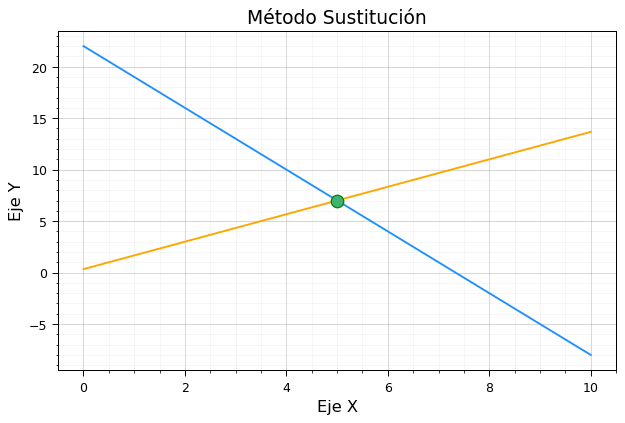

In [6]:
hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver), dpi=90)

plt.plot(x, y1, linestyle='-', color='dodgerblue', label='Ecuación 1')
plt.plot(x, y2, linestyle='-', color='orange', label='Ecuación 2')
plt.plot(5, 7, marker='o', ms='10', markerfacecolor='mediumseagreen', markeredgecolor='green', label='Solución: (5,7)')

formato_grafica(titulo='Método Sustitución', 
                ejex='Eje X', 
                ejey='Eje Y',
                leyenda=False)

### 1.4.2. Método de Igualación

Consiste en despejar la misma incógnita en dos ecuaciones y a continuación se igualan entre sí la parte derecha de ambas ecuaciones.

El paso a paso es:
1. Se despeja la misma incógnita en ambas ecuaciones.
2. Se igualan las expresiones, con lo que obtenemos una ecuación con una incógnita.
3. Se resuelve la ecuación.
4. El valor obtenido se sustituye en cualquiera de las dos expresiones en las que aparecía despejada la otra incógnita.

Con el ejemplo anterior:

$$
\begin{cases}
  3x_1 + x_2 = 22 & (1)\\ 
  \\
  4x_1 - 3x_2 = -1 & (2)\\
\end{cases} 
$$

**Paso 1.** Despejamos $x_2$ de las dos ecuaciones:

$$
\begin{cases}
  x_2 = 22 - 3x_1 & (3)\\ 
  \\
  x_2 = \frac{4x_1 + 1}{3} & (4)\\
\end{cases} 
$$

**Paso 2.** Igualamos la Ecuación 3 y Ecuación 4:

$$
22 - 3x_1 = \frac{4x_1 + 1}{3} \hspace{1cm} (5)
$$

**Paso 3.** Resolvemos la Ecuación 5 para determinar $x_1$:

$$
3 (22 - 3x_1) = 4x_1 + 1
$$

$$
13x_1 = 65
$$

$$
\boxed{x_1 = 5}
$$

**Paso 4.** Ahora sustituimos $x_1$ en la Ecuación 1 o Ecuación 2 para determinar $x_2$:

$$
3(5) + x_2 = 22
$$

$$
\boxed{x_2 = 7}
$$

### 1.4.3. Método de Reducción

Consiste en transformar una de las ecuaciones de manera que obtengamos dos ecuaciones en la que **una misma incógnita aparezca con el mismo coeficiente y distinto signo**. Luego, se suman ambas ecuaciones produciéndose así la reducción o cancelación de dicha incógnita, obteniendo así una ecuación con una sola incógnita, donde el método de resolución es simple.

El paso a paso es:
1. Se preparan las dos ecuaciones, multiplicándolas por los números que convenga.
2. La restamos o sumamos de forma que desaparece una de las incógnitas.
3. Se resuelve la ecuación resultante.
4. El valor obtenido se sustituye en una de las ecuaciones iniciales y se resuelve.

Por ejemplo:

$$
\begin{cases}
  2x_1 + 3x_2 = 5 & (1)\\ 
  \\
  5x_1 + 6x_2 = 4 & (2)\\
\end{cases} 
$$

**Paso 1.** Multiplicamos la Ecuación 1 por -2 para, al sumar con la Ecuación 2, eliminar $x_2$:

$$
-2 (2x_1 + 3x_2 = 5) \hspace{0.5cm} \rightarrow \hspace{0.5cm} -4x_1 - 6x_2 = -10 \hspace{1cm} (3)
$$

**Paso 2 y 3.** Se suman la Ecuación 3 y Ecuación 2:

$$
(-4x_1 + 5x_1) + (-6x_2 + 6x_2) = (-10 + 4)
$$

$$
\boxed{x_1 = -6}
$$

**Paso 4.** Ahora sustituimos $x_1$ en la Ecuación 1 o Ecuación 2 para determinar $x_2$:

$$
2(-6) + 3x_2 = 55
$$

$$
\boxed{x_2 = 17/3 \approx 5.7}
$$

In [7]:
# Definimos valores de X para evaluar
x = np.linspace(start=-10, stop=10, num=21)
x

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [8]:
# Definimos la Ecuación 1
def ec1(x):
    return (5 - 2*x) / 3

y1 = ec1(x)
y1

array([ 8.33333333,  7.66666667,  7.        ,  6.33333333,  5.66666667,
        5.        ,  4.33333333,  3.66666667,  3.        ,  2.33333333,
        1.66666667,  1.        ,  0.33333333, -0.33333333, -1.        ,
       -1.66666667, -2.33333333, -3.        , -3.66666667, -4.33333333,
       -5.        ])

In [9]:
# Definimos la Ecuación 2
def ec2(x):
    return (4 - 5*x) /6

y2 = ec2(x)
y2

array([ 9.        ,  8.16666667,  7.33333333,  6.5       ,  5.66666667,
        4.83333333,  4.        ,  3.16666667,  2.33333333,  1.5       ,
        0.66666667, -0.16666667, -1.        , -1.83333333, -2.66666667,
       -3.5       , -4.33333333, -5.16666667, -6.        , -6.83333333,
       -7.66666667])

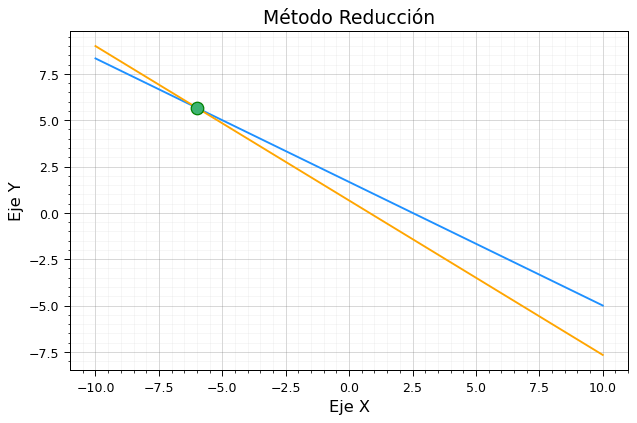

In [10]:
hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver), dpi=90)

plt.plot(x, y1, linestyle='-', color='dodgerblue', label='Ecuación 1')
plt.plot(x, y2, linestyle='-', color='orange', label='Ecuación 2')
plt.plot(-6, 17.0/3.0, marker='o', ms='10', markerfacecolor='mediumseagreen', markeredgecolor='green', label='Solución: (-6,5.7)')

formato_grafica(titulo='Método Reducción', 
                ejex='Eje X', 
                ejey='Eje Y',
                leyenda=False)

### 1.4.4. Método de Matrices con `numpy`

De forma genérica, tenemos $m$ ecuaciones lineales con $n$ incógnitas, donde las incógnitas son $x_1, x_2, ..., x_n$.

$$
\begin{cases}
  a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n = b_1 & (1) \\ 
  \\
  a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n = b_2 & (2) \\
  \\
  \hspace{2.5cm} \vdots \\
  \\
   a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n = b_n & (m) \\
\end{cases} 
$$

Ahora, si separamos los coeficientes $a_{nm}$, es posible reescribir el sistema de ecuaciones en forma matricial, es decir:

$$
{\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1n} \\
a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \dots & a_{mn} \\
\end{bmatrix}}
{\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n \\
\end{bmatrix}} =
{\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n \\
\end{bmatrix}}
$$

Representando cada matrix con una letra, se tiene:

$$
Ax = b
$$

Donde:
- $A$ es una matriz de $m$ filas por $n$ columnas y se conoce como **matriz de coeficientes**.
- $x$ es un vector columna de longitud $n$ (es decir, 1 columna y $n$ filas) y se conoce como **vector de incógnitas**.
- $b$ es un vector columna de longitud $m$ (es decir, 1 columna y $m$ filas) y se conoce como **vector de términos independientes**.

La solución es entonces:

$$
\boxed{x = A^{-1} b}
$$

El término $A^{-1}$ es la **inversa de la matrix $A$**.

En Python, el método de matrices se puede realizar empleando las librerías `numpy.linalg.inv` y `numpy.dots`, `numpy.linalg.solve`, y `sympy`.

Partamos del ejemplo resuelto anteriormente:

$$
\begin{cases}
  3x_1 + x_2 = 22 & (1)\\ 
  \\
  4x_1 - 3x_2 = -1 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{x_1 = 5}
$$

$$
\boxed{x_2 = 7}
$$

#### 1.4.4.1 Empleando `numpy.linalg.inv` y `numpy.dots`

In [11]:
# PASO 1. Matriz de coeficientes (2 filas y 2 columnas)
A = np.array( [ [3, 1],
                [4, -3] ] )

A

array([[ 3,  1],
       [ 4, -3]])

In [12]:
# PASO 2. Vector de términos independientes (2 filas y 1 columna)
b = np.array( [22, -1] )
b

array([22, -1])

In [13]:
# PASO 3. Inversa de matriz de coeficientes -> A
invA = np.linalg.inv(A)
invA

array([[ 0.23076923,  0.07692308],
       [ 0.30769231, -0.23076923]])

In [14]:
# PASO 4. Vector de incógnitas (2 filas y 1 columna) -> invA · b
x = np.dot(invA, b)
x

array([5., 7.])

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con las librerías `numpy.linalg.inv` y `numpy.dots` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  2x_1 + 3x_2 = 5 & (1)\\ 
  \\
  5x_1 + 6x_2 = 4 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{x_1 = -6}
$$

$$
\boxed{x_2 = 17/3 \approx 5.7}
$$

</div>

In [ ]:
A = np.array( [ [2, 3],
                [5, 6] ] )
b = np.array( [5, 4] )
x = np.dot(A, b)
x

#### 1.4.4.2 Empleando `numpy.linalg.solve`

$$
\begin{cases}
  3x_1 + x_2 = 22 & (1)\\ 
  \\
  4x_1 - 3x_2 = -1 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{x_1 = 5}
$$

$$
\boxed{x_2 = 7}
$$

In [15]:
# PASO 1. Matriz de coeficientes (2 filas y 2 columnas)
A = np.array( [ [3, 1],
                [4, -3] ] )

A

array([[ 3,  1],
       [ 4, -3]])

In [16]:
# PASO 2. Vector de términos independientes (2 filas y 1 columna)
b = np.array( [22, -1] )
b

array([22, -1])

In [17]:
# PASO 3. Vector de incógnitas (2 filas y 1 columna) -> invA · b
x = np.linalg.solve(A, b)
x

array([5., 7.])

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con la librería `numpy.linalg.solve` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  2x_1 + 3x_2 = 5 & (1)\\ 
  \\
  5x_1 + 6x_2 = 4 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{x_1 = -6}
$$

$$
\boxed{x_2 = 17/3 \approx 5.7}
$$

</div>

In [42]:
A = np.array( [ [2, 3],
                [5, 6] ] )
b = np.array( [5, 4] )
x = np.linalg.solve(A, b)
x

array([-6.        ,  5.66666667])

#### 1.4.4.3 Empleando `sympy.rref()`

$$
\begin{cases}
  3x_1 + x_2 = 22 & (1)\\ 
  \\
  4x_1 - 3x_2 = -1 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{x_1 = 5}
$$

$$
\boxed{x_2 = 7}
$$

In [18]:
# PASO 1. Matriz de coeficientes y vector de términos independientes
A_aumentada = sympy.Matrix( [ [3, 1, 22],
                              [4, -3, -1] ] )

A_aumentada

Matrix([
[3,  1, 22],
[4, -3, -1]])

In [19]:
# PASO 2. Solución mediante matriz escalonada
x = A_aumentada.rref()[0]
x

Matrix([
[1, 0, 5],
[0, 1, 7]])

A partir del resultado obtenido:
1. ¿Qué pueden observar e interpretar del término *matriz escalonada*?
2. ¿Cuál es la solución?

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con la librería `sympy` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  2x_1 + 3x_2 = 5 & (1)\\ 
  \\
  5x_1 + 6x_2 = 4 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{x_1 = -6}
$$

$$
\boxed{x_2 = 17/3 \approx 5.7}
$$

</div>

In [43]:
A_aumentada = sympy.Matrix( [ [2, 3, 5],
                              [5, 6, 4] ] )
x = A_aumentada.rref()[0]
x

Matrix([
[1, 0,   -6],
[0, 1, 17/3]])

### 1.4.5. Librería `scipy.optimize.fsolve`

Recordemos que la librería `scipy.optimize.fsolve` la utilizamos para determinar las raíces de una función.

Esta librería requiere dos parámetros de entrada:
1. Función (en este caso el sistema de ecuaciones).
2. Una primera estimación.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.optimize.fsolve` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).
</div>

Veamos la sintaxis de `scipy.optimize.fsolve` con el Ejemplo 1:

$$
\begin{cases}
  3x_1 + x_2 = 22 & (1)\\ 
  \\
  4x_1 - 3x_2 = -1 & (2)\\
\end{cases}
$$

Donde las soluciones son:

$$
\boxed{x_1 = 5}
$$

$$
\boxed{x_2 = 7}
$$

In [20]:
# PASO 1. Definir la función
def f(z):
    ## Definimos las incógnitas
    x1 = z[0]
    x2 = z[1]
    
    ## Creamos una lista vacía para alojar las funciones
    F = np.zeros(2)
    
    ## Alojamos las funciones en F (noten la parte derecha igual a cero)
    F[0] = 3*x1 + x2 - 22
    F[1] = 4*x1 - 3*x2 + 1
    
    return F

In [21]:
# PASO 2. Indicar valor cercano a la raíz
estimacion = [1, 1]
estimacion

[1, 1]

In [22]:
# PASO 3. Estimar raíz
x = optimize.fsolve(func=f,
                    x0=estimacion)

x

array([5., 7.])

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con la librería `scipy.optimize.fsolve` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  2x_1 + 3x_2 = 5 & (1)\\ 
  \\
  5x_1 + 6x_2 = 4 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{x_1 = -6}
$$

$$
\boxed{x_2 = 17/3 \approx 5.7}
$$

</div>

In [54]:
import scipy
def f(z):
    x1 = z[0]
    x2 = z[1]
    
    F = np.zeros(2)
    
    F[0] = 2 * x1 + 3 * x2 - 5
    F[1] = 5 * x1 + 6 * x2 - 4
    
    return F

rango = [1,1]
x = scipy.optimize.fsolve(func = f, 
                       x0=rango)
x

array([-6.        ,  5.66666667])

### 1.4.6. Librería `sympy.solve`

La forma en como podemos expresar las ecuaciones en código de forma 'similar a cuando la escribimos en una hoja' es de forma **simbólica**.

La librería de Python que permite definir variables en forma simbólica es `sympy`. Esto se realiza mediante la función `sympy.Symbol`.

A partir de las variables simbólicas y, empleando la función `sympy.solve`, podemos encontrar la solución del sistema de ecuaciones lineales.

El flujo de trabajo es:

1. Definiremos las variables simbólicas.
2. Definiremos el sistema de ecuaciones.
3. Encontraremos las soluciones mediante la función `sympy.solve`.

La ventaja que tenemos sobre las demás funciones es que solo basta con escribir la función en forma simbólica para poder estimar las raíces.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sympy.solve` dando clic [aquí](https://docs.sympy.org/latest/modules/solvers/solvers.html).
</div>

Veamos la sintaxis de `sympy.solve` con el Ejemplo 1:

$$
\begin{cases}
  3x_1 + x_2 = 22 & (1)\\ 
  \\
  4x_1 - 3x_2 = -1 & (2)\\
\end{cases}
$$

Donde las soluciones son:

$$
\boxed{x_1 = 5}
$$

$$
\boxed{x_2 = 7}
$$

In [23]:
# PASO 1. Definir las variables simbólicas
x1 = sympy.Symbol('x_1')
x1

x_1

In [24]:
x2 = sympy.Symbol('x_2')
x2

x_2

In [25]:
# PASO 2. Definir las funciones simbólicas
ec1 = sympy.Eq(3*x1 + x2, 22) # La derecha de la igualdad va después de la coma
ec1

Eq(3*x_1 + x_2, 22)

In [26]:
ec2 = sympy.Eq(4*x1 - 3*x2, -1)
ec2

Eq(4*x_1 - 3*x_2, -1)

In [27]:
# PASO 3. Solucionar el sistema de ecuaciones
sol = sympy.solve([ec1, ec2], # Lista de ecuaciones
                  [x1, x2]) # Lista de símbolos
sol

{x_1: 5, x_2: 7}

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con la librería `sympy.solve` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  2x_1 + 3x_2 = 5 & (1)\\ 
  \\
  5x_1 + 6x_2 = 4 & (2)\\
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{x_1 = -6}
$$

$$
\boxed{x_2 = 17/3 \approx 5.7}
$$

</div>

In [56]:
x1 = sympy.Symbol('x_1')
x2 = sympy.Symbol('x_2')
ec1 = sympy.Eq(2*x1 + 3*x2, 5) # La derecha de la igualdad va después de la coma
ec2 = sympy.Eq(5*x1 + 6*x2, 4)
sol = sympy.solve([ec1, ec2], # Lista de ecuaciones
                  [x1, x2]) # Lista de símbolos
sol

{x_1: -6, x_2: 17/3}

## 1.5. Resolución de Sistema de Ecuaciones No Lineales

Las soluciones de sistemas de ecuaciones no lineales emplean métodos numéricos, similar a como lo estudiamos en la Semana 4.

Notemos que el método de sustitución también es aplicable cuando las ecuaciones son no lineales, sin embargo, su desarrollo manual es más laborioso y propenso a errores.

Veremos cómo sacarle provecho a los desarrollos realizados con las librerías `scipy` y `sympy`.

### 1.5.1. Librería `scipy.optimize.fsolve`

Para solucionar sistemas de ecuaciones **no** lineales, la sintaxis de la librería `scipy.optimize.fsolve` es exactamente la misma.

Es decir, mantenemos dos parámetros de entrada:
1. Función (en este caso el sistema de ecuaciones).
2. Una primera estimación.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.optimize.fsolve` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).
</div>

Empleemos la librería `scipy.optimize.fsolve` para estimar la solución del siguiente sistema de ecuaciones no lineales:

$$
\begin{cases}
  x_2 = x_1^2 + 6x_1 - 8 & (1) \\ 
  \\
  x_2 = 4x_1 + 7 & (2)
\end{cases} 
$$

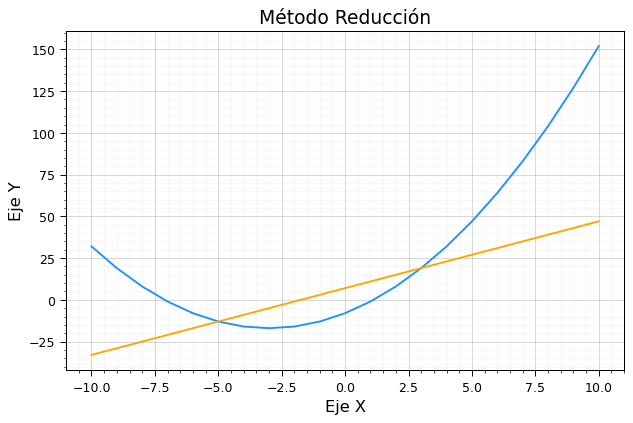

In [28]:
# Inspección gráfica
x = np.linspace(start=-10, stop=10, num=21)

def ec1(x):
    return x**2 + 6*x - 8

def ec2(x):
    return 4*x + 7

y1 = ec1(x)
y2 = ec2(x)

hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver), dpi=90)

plt.plot(x, y1, linestyle='-', color='dodgerblue', label='Ecuación 1')
plt.plot(x, y2, linestyle='-', color='orange', label='Ecuación 2')

formato_grafica(titulo='Método Reducción', 
                ejex='Eje X', 
                ejey='Eje Y',
                leyenda=False)

In [29]:
# PASO 1. Definir la función
def f(z):
    ## Definimos las incógnitas
    x1 = z[0]
    x2 = z[1]
    
    ## Creamos una lista vacía para alojar las funciones
    F = np.zeros(2)
    
    ## Alojamos las funciones en F (noten la parte derecha igual a cero)
    F[0] = x2 - x1**2 - 6*x1 + 8
    F[1] = x2 - 4*x1 - 7
    
    return F

In [30]:
# PASO 2. Indicar valor cercano a la raíz
estimacion = [1, 1]
estimacion

[1, 1]

In [31]:
# PASO 3. Solucionar el sistema de ecuaciones
sol = optimize.fsolve(func=f,
                      x0=estimacion)

sol

array([ 3., 19.])

In [32]:
# PASO 3. Solucionar el sistema de ecuaciones
sol = optimize.fsolve(func=f,
                      x0=[-5, 0])

sol

array([ -5., -13.])

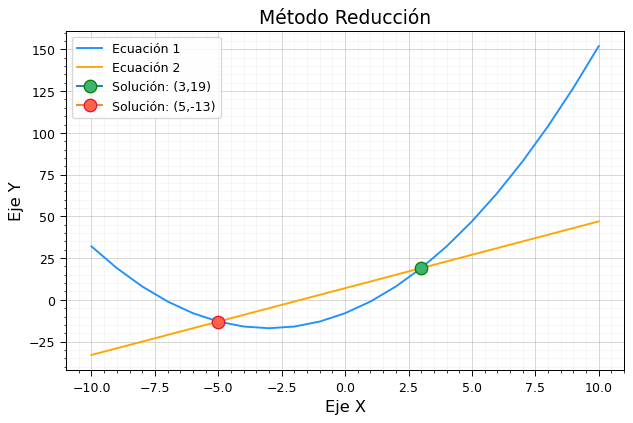

In [33]:
hor = 8
ver = 5
fig1 = plt.figure(figsize=(hor, ver), dpi=90)

plt.plot(x, y1, linestyle='-', color='dodgerblue', label='Ecuación 1')
plt.plot(x, y2, linestyle='-', color='orange', label='Ecuación 2')

# Solución ↓
plt.plot(3, 19, marker='o', ms='10', markerfacecolor='mediumseagreen', markeredgecolor='green', label='Solución: (3,19)')
plt.plot(-5, -13, marker='o', ms='10', markerfacecolor='tomato', markeredgecolor='crimson', label='Solución: (5,-13)')


formato_grafica(titulo='Método Reducción', 
                ejex='Eje X', 
                ejey='Eje Y',
                leyenda=True)


<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con la librería `scipy.optimize.fsolve` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  x_1^2 + x_2^2 = 36 & (1) \\ 
  \\
  x_1 + x_2 = 7 & (2)
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{x_1 = (1.1, 5.8)}
$$

$$
\boxed{x_2 = (5.8, 1.1)}
$$

</div>

In [63]:
import scipy
def f(z):
    x1 = z[0]
    x2 = z[1]
    
    F = np.zeros(2)
    
    F[0] = x1**2 + x2**2 - 36
    F[1] = x1 + x2 - 7
    
    return F

rango1 = [1,1]
rango2 = [1,1]
x1 = scipy.optimize.fsolve(func = f, 
                       x0=rango)
x2 = scipy.optimize.fsolve(func = f, 
                       x0=[0,1])

print(x1,x2)

[1.10208424 5.89791576] [5.89791576 1.10208424]


### 1.5.2. Librería `scipy.optimize.root`

La sintaxis es exactamente la misma a la de la librería `scipy.optimize.fsolve`.

Es decir, mantenemos dos parámetros de entrada:
1. Función (en este caso el sistema de ecuaciones).
2. Una primera estimación.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `scipy.optimize.root` dando clic [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html).
</div>

In [34]:
# PASO 1. Definir la función
def f(z):
    ## Definimos las incógnitas
    x1 = z[0]
    x2 = z[1]
    
    ## Creamos una lista vacía para alojar las funciones
    F = np.array( [ x2 - x1**2 - 6*x1 + 8,
                    x2 - 4*x1 - 7])
    
    return F

In [35]:
# PASO 2. Indicar valor cercano a la raíz
estimacion = [1, 1]
estimacion

[1, 1]

In [36]:
# PASO 3. Solucionar el sistema de ecuaciones
x = optimize.root(fun=f,
                  x0=estimacion)

x

    fjac: array([[-0.93507555, -0.35444848],
       [ 0.35444848, -0.93507555]])
     fun: array([-1.61648472e-13,  0.00000000e+00])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-5.98880940e-08,  2.27011023e-08])
       r: array([11.28513798, -0.95113821, -0.70889514])
  status: 1
 success: True
       x: array([ 3., 19.])

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con la librería `scipy.optimize.root` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  x_1^2 + x_2^2 = 36 & (1) \\ 
  \\
  x_1 + x_2 = 7 & (2)
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{x_1 = (1.1, 5.8)}
$$

$$
\boxed{x_2 = (5.8, 1.1)}
$$

</div>

In [66]:
def f(z):
    ## Definimos las incógnitas
    x1 = z[0]
    x2 = z[1]
    
    ## Creamos una lista vacía para alojar las funciones
    F = np.array( [ x1**2 + x2**2 -36,
                    x1 + x2 - 7])
    
    return F
estimacion = [1, 1]
x1 = optimize.root(fun=f,
                  x0=estimacion)
x2 = optimize.root(fun=f,
                  x0=[6,1])

print(x1,x2)

    fjac: array([[-0.9314845 , -0.36378101],
       [ 0.36378101, -0.9314845 ]])
     fun: array([-7.10542736e-15,  0.00000000e+00])
 message: 'The solution converged.'
    nfev: 22
     qtf: array([-3.70811444e-09,  1.44816325e-09])
       r: array([ -2.74890654, -11.68338518,   3.48926221])
  status: 1
 success: True
       x: array([1.10208424, 5.89791576])     fjac: array([[-0.99630816, -0.08584898],
       [ 0.08584898, -0.99630816]])
     fun: array([1.63424829e-12, 0.00000000e+00])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.80255609e-07,  1.55321021e-08])
       r: array([-11.64836214,  -2.0920234 ,  -0.82344194])
  status: 1
 success: True
       x: array([5.89791576, 1.10208424])


### 1.5.3. Librería `sympy.solve`

De nuevo, aprovechamos las bondades de trabajar con variables simbólicas con la librería `sympy`.

Al igual que en el caso del sistema de ecuaciones lineales, a partir de las variables simbólicas y, empleando la función `sympy.solve`, podemos encontrar la solución del sistema de ecuaciones **no** lineales.

El flujo de trabajo es:

1. Definiremos las variables simbólicas.
2. Definiremos el sistema de ecuaciones.
3. Encontraremos las soluciones mediante la función `sympy.solve`.

<div class='alert alert-block alert-info'>   
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en la documentación oficial de la librería `sympy.solve` dando clic [aquí](https://docs.sympy.org/latest/modules/solvers/solvers.html).
</div>

Encontremos las soluciones del siguiente sistema de ecuaciones no lineales, utilizando `sympy.solve`:

$$
\begin{cases}
  x_2 = x_1^2 + 6x_1 - 8 & (1) \\ 
  \\
  x_2 = 4x_1 + 7 & (2)
\end{cases} 
$$

In [37]:
# PASO 1. Definir las variables simbólicas
x1 = sympy.Symbol('x_1')
x1

x_1

In [38]:
x2 = sympy.Symbol('x_2')
x2

x_2

In [39]:
# PASO 2. Definir las funciones simbólicas
ec1 = sympy.Eq(x2, x1**2 + 6*x1 -8) # La derecha de la igualdad va después de la coma
ec1

Eq(x_2, x_1**2 + 6*x_1 - 8)

In [40]:
ec2 = sympy.Eq(x2, 4*x1 + 7)
ec2

Eq(x_2, 4*x_1 + 7)

In [41]:
# PASO 3. Solucionar el sistema de ecuaciones
sol = sympy.solve([ec1, ec2], # Lista de ecuaciones
                  [x1, x2]) # Lista de símbolos
sol

[(-5, -13), (3, 19)]

<div class="alert alert-block alert-warning">   

**SU TURNO**

Resuelva con la librería `sympy.solve` el siguiente sistema de ecuaciones lineales.

$$
\begin{cases}
  x_1^2 + x_2^2 = 36 & (1) \\ 
  \\
  x_1 + x_2 = 7 & (2)
\end{cases} 
$$

Donde las soluciones son:

$$
\boxed{x_1 = (1.1, 5.8)}
$$

$$
\boxed{x_2 = (5.8, 1.1)}
$$

</div>

In [67]:
x1 = sympy.Symbol('x_1')
x1
x2 = sympy.Symbol('x_2')
x2
ec1 = sympy.Eq(36, x1**2 + x2**2 ) # La derecha de la igualdad va después de la coma
ec1
ec2 = sympy.Eq(7, x1 + x2)
ec2
sol = sympy.solve([ec1, ec2], # Lista de ecuaciones
                  [x1, x2]) # Lista de símbolos
sol

[(7/2 - sqrt(23)/2, sqrt(23)/2 + 7/2), (sqrt(23)/2 + 7/2, 7/2 - sqrt(23)/2)]